In [1]:
import numpy as np
from sklearn import manifold
from matplotlib import pyplot as plt
%matplotlib inline
import lap
#import hungarian

In [2]:
side = 45
totalDataPoints = side * side
data3d = np.random.uniform(low=0.0, high=1.0, size=(totalDataPoints, 3))

In [3]:
tsne = manifold.TSNE(n_components=2, learning_rate=50)
%time data2d = tsne.fit_transform(data3d)

Wall time: 39.3 s


In [4]:
data2d -= data2d.min(axis=0)
data2d /= data2d.max(axis=0)

In [5]:
data2d.shape

(2025, 2)

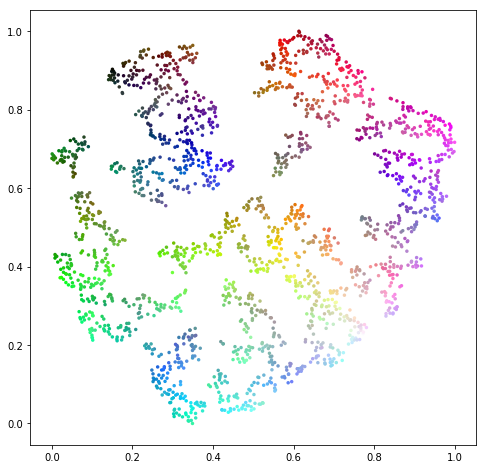

In [6]:
plt.figure(figsize=(8, 8))
plt.scatter(data2d[:,0], data2d[:,1], c=data3d, edgecolors='none', marker='o', s=12)  
plt.show()

In [7]:
xv, yv = np.meshgrid(np.linspace(0, 1, side), np.linspace(0, 1, side))
grid = np.dstack((xv, yv)).reshape(-1, 2)

In [8]:
from scipy.spatial.distance import cdist

Wall time: 18 ms


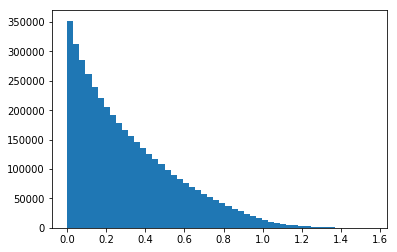

In [9]:
%time cost = cdist(grid, data2d, 'sqeuclidean')
plt.hist(cost.flatten(), bins=50)
plt.show()

In [12]:
cost.shape

(2025, 2025)

In [14]:
grid.shape

(2025, 2)

In [15]:
cost.flatten().shape

(4100625,)

Wall time: 2.81 s
(2025,)


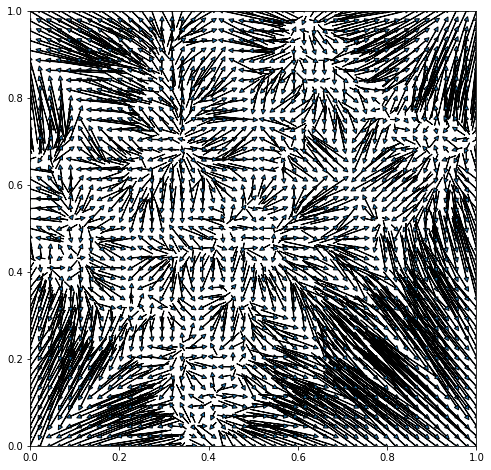

In [10]:
#help('lap')
%time min_cost, row_assigns, col_assigns = lap.lapjv(np.copy(cost))
grid_jv = grid[col_assigns]
print (col_assigns.shape)
plt.figure(figsize=(8, 8))
for start, end in zip(data2d, grid_jv):
    plt.arrow(start[0], start[1], end[0] - start[0], end[1] - start[1],
              head_length=0.01, head_width=0.01)
plt.show()

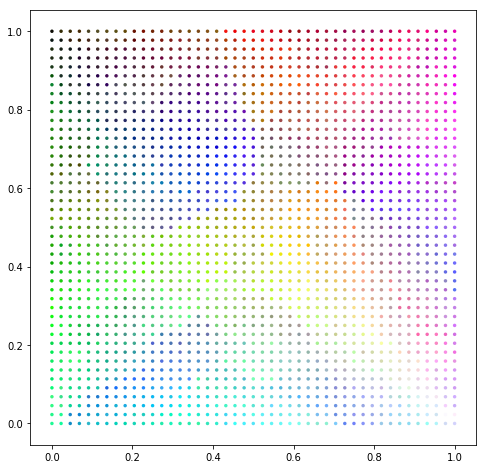

In [11]:
plt.figure(figsize=(8,8))
plt.scatter(grid_jv[:,0], grid_jv[:,1],  c=data3d,edgecolors='none', marker='o', s=12)
plt.show()